# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

C:\Users\LU Chenbo\Desktop\WinPython-64bit-3.5.3.1Qt5\notebooks\assignment1\cs231n\features.py:121: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy].T


Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e3,5e4, 5e5, 5e6]

results = {}
best_val = 0
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
                      num_iters=1500, verbose=True)
        train_accuracy = (svm.predict(X_train_feats) == y_train).mean()
        val_accuracy = (svm.predict(X_val_feats)==y_val).mean()
        results[(lr, reg)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            best_svm = svm
            best_val = val_accuracy
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 17.001125
iteration 100 / 1500: loss 16.976498
iteration 200 / 1500: loss 16.958681
iteration 300 / 1500: loss 16.939443
iteration 400 / 1500: loss 16.940917
iteration 500 / 1500: loss 16.909705
iteration 600 / 1500: loss 16.904803
iteration 700 / 1500: loss 16.881152
iteration 800 / 1500: loss 16.875347
iteration 900 / 1500: loss 16.839490
iteration 1000 / 1500: loss 16.823461
iteration 1100 / 1500: loss 16.832585
iteration 1200 / 1500: loss 16.816288
iteration 1300 / 1500: loss 16.794967
iteration 1400 / 1500: loss 16.771103
iteration 0 / 1500: loss 86.906030
iteration 100 / 1500: loss 85.368566
iteration 200 / 1500: loss 83.843634
iteration 300 / 1500: loss 82.372597
iteration 400 / 1500: loss 80.924975
iteration 500 / 1500: loss 79.505922
iteration 600 / 1500: loss 78.104065
iteration 700 / 1500: loss 76.728186
iteration 800 / 1500: loss 75.384120
iteration 900 / 1500: loss 74.068456
iteration 1000 / 1500: loss 72.783499
iteration 1100 / 1500: loss 71.51949

In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.429


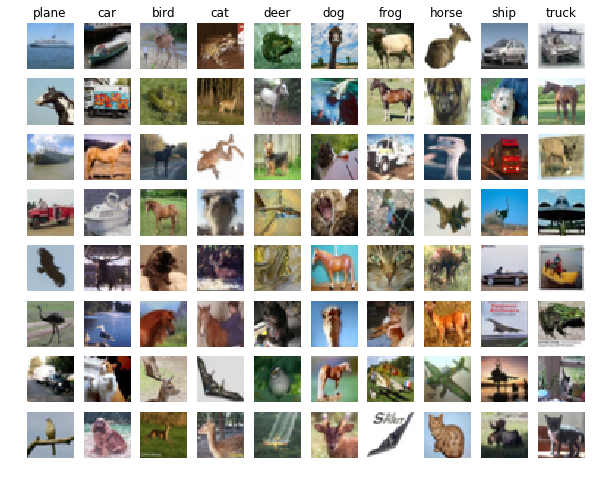

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense? <br>
Although some images match their class, there are still lot of images are wrong. 
The accuracy is too low. But it makes some sense as the some of the images classified to the same class look alike and have similar background color.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
print(X_train_feats.shape)

(49000, 155)


In [8]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10


best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
learning_rates = [0.1,1]
regularization_strengths = [0.001,0.005,0.01,0.05]
results = {}
best_val_accuracy = 0
for lr in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        loss_hist = net.train(X_train_feats,y_train,X_val_feats,y_val,num_iters=2000,batch_size=400,learning_rate=lr,learning_rate_decay=0.85,reg=reg,verbose=True)
        val_accuracy =(net.predict(X_val_feats) == y_val).mean()
        train_accuracy = (net.predict(X_train_feats) == y_train).mean()
        results[(lr,reg)] = (train_accuracy,val_accuracy)
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_net = net
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
print("best accuray is : ",best_val_accuracy)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 2000: loss 2.302586
iteration 100 / 2000: loss 2.302172
iteration 200 / 2000: loss 2.193118
iteration 300 / 2000: loss 1.864766
iteration 400 / 2000: loss 1.732404
iteration 500 / 2000: loss 1.574893
iteration 600 / 2000: loss 1.486214
iteration 700 / 2000: loss 1.461004
iteration 800 / 2000: loss 1.411372
iteration 900 / 2000: loss 1.460649
iteration 1000 / 2000: loss 1.354411
iteration 1100 / 2000: loss 1.407924
iteration 1200 / 2000: loss 1.352655
iteration 1300 / 2000: loss 1.424354
iteration 1400 / 2000: loss 1.524563
iteration 1500 / 2000: loss 1.401702
iteration 1600 / 2000: loss 1.326175
iteration 1700 / 2000: loss 1.374607
iteration 1800 / 2000: loss 1.301197
iteration 1900 / 2000: loss 1.340957
iteration 0 / 2000: loss 2.302589
iteration 100 / 2000: loss 2.302859
iteration 200 / 2000: loss 2.218297
iteration 300 / 2000: loss 1.881887
iteration 400 / 2000: loss 1.826329
iteration 500 / 2000: loss 1.690465
iteration 600 / 2000: loss 1.542737
iteration 700 / 2000: 

In [14]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.598


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

In [ ]:
# In this part, another optimization method: Momentum is used to optimize the neural network
# And it will compare two optimization methods by their accuracy after a fixed number of iterations
from cs231n.classifiers.neural_net_momentum import TwoLayerNetMomentum
input_dim = X_train_feats.shape[1]
hidden_dim = 300
num_classes = 10
best_net = None
learning_rates = [1e-2,1e-1,1]
regularization_strengths = [1e-3,1e-2]
results = {}
best_val_accuracy = 0
for lr in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNetMomentum(input_dim, hidden_dim, num_classes)
        loss_hist = net.train(X_train_feats,y_train,X_val_feats,y_val,num_iters=2000,batch_size=400,reg=reg,verbose=True,beta=0.9,alpha=lr,alpha_decay=0.95)
        val_accuracy =(net.predict(X_val_feats) == y_val).mean()
        train_accuracy = (net.predict(X_train_feats) == y_train).mean()
        results[(lr,reg)] = (train_accuracy,val_accuracy)
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_net = net
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
print("best accuray is : ",best_val_accuracy)

iteration 0 / 2000: loss 2.302586
iteration 100 / 2000: loss 2.302598
iteration 200 / 2000: loss 2.302533
iteration 300 / 2000: loss 2.302411
iteration 400 / 2000: loss 2.302743
iteration 500 / 2000: loss 2.302624
iteration 600 / 2000: loss 2.302778
iteration 700 / 2000: loss 2.302727
iteration 800 / 2000: loss 2.302353
iteration 900 / 2000: loss 2.302249
iteration 1000 / 2000: loss 2.302344
iteration 1100 / 2000: loss 2.302186
iteration 1200 / 2000: loss 2.302159
iteration 1300 / 2000: loss 2.301569
iteration 1400 / 2000: loss 2.300702
iteration 1500 / 2000: loss 2.298809
iteration 1600 / 2000: loss 2.297732
iteration 1700 / 2000: loss 2.293961
iteration 1800 / 2000: loss 2.289059
iteration 1900 / 2000: loss 2.281149
iteration 0 / 2000: loss 2.302590
iteration 100 / 2000: loss 2.302551
iteration 200 / 2000: loss 2.302594
iteration 300 / 2000: loss 2.302539
iteration 400 / 2000: loss 2.302615
iteration 500 / 2000: loss 2.302547
iteration 600 / 2000: loss 2.302577
iteration 700 / 2000: 

In [10]:
test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.316


In [11]:
#Now we compare their performance after different number of iterations
num_of_iterations = [1000,1500,2000,3000,5000]
input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10
results = {}
m_h=[]
sgd_h=[]
for noi in num_of_iterations:
    netM = TwoLayerNetMomentum(input_dim, hidden_dim, num_classes)
    loss_hist = netM.train(X_train_feats,y_train,X_val_feats,y_val,num_iters=noi,batch_size=400,reg=1e-3,verbose=True,beta=0.85,alpha=2e-1,alpha_decay=0.95)
    val_accuracy_m =(netM.predict(X_val_feats) == y_val).mean()
    m_h.append(val_accuracy_m)
    net = TwoLayerNet(input_dim, hidden_dim, num_classes)
    loss_hist = net.train(X_train_feats,y_train,X_val_feats,y_val,num_iters=noi,batch_size=400,learning_rate=2e-1,learning_rate_decay=0.95,reg=1e-3,verbose=True)
    val_accuracy =(net.predict(X_val_feats) == y_val).mean()
    sgd_h.append(val_accuracy )
    results[noi] = (val_accuracy_m,val_accuracy)
for n in results:
    accuracym,accuracy = results[n]
    print('number of iterations: %d , accuracy Momentom: %f ,accuracy SGD: %f'%(n,accuracym,accuracy))

iteration 0 / 1000: loss 2.302586
iteration 100 / 1000: loss 2.137431
iteration 200 / 1000: loss 1.610046
iteration 300 / 1000: loss 1.442548
iteration 400 / 1000: loss 1.315741
iteration 500 / 1000: loss 1.387787
iteration 600 / 1000: loss 1.346395
iteration 700 / 1000: loss 1.367591
iteration 800 / 1000: loss 1.334854
iteration 900 / 1000: loss 1.224286
iteration 0 / 1000: loss 2.302586
iteration 100 / 1000: loss 2.105617
iteration 200 / 1000: loss 1.539053
iteration 300 / 1000: loss 1.447625
iteration 400 / 1000: loss 1.459177
iteration 500 / 1000: loss 1.353214
iteration 600 / 1000: loss 1.366749
iteration 700 / 1000: loss 1.440971
iteration 800 / 1000: loss 1.380194
iteration 900 / 1000: loss 1.320131
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.125007
iteration 200 / 1500: loss 1.586462
iteration 300 / 1500: loss 1.471973
iteration 400 / 1500: loss 1.447013
iteration 500 / 1500: loss 1.331429
iteration 600 / 1500: loss 1.384249
iteration 700 / 1500: loss 1.39161

iteration 2500 / 5000: loss 1.106446
iteration 2600 / 5000: loss 1.043804
iteration 2700 / 5000: loss 1.123860
iteration 2800 / 5000: loss 1.136157
iteration 2900 / 5000: loss 1.069767
iteration 3000 / 5000: loss 1.123637
iteration 3100 / 5000: loss 1.168024
iteration 3200 / 5000: loss 1.119402
iteration 3300 / 5000: loss 1.162856
iteration 3400 / 5000: loss 1.119331
iteration 3500 / 5000: loss 1.038217
iteration 3600 / 5000: loss 1.088777
iteration 3700 / 5000: loss 1.083579
iteration 3800 / 5000: loss 1.060403
iteration 3900 / 5000: loss 1.060695
iteration 4000 / 5000: loss 1.062880
iteration 4100 / 5000: loss 1.118273
iteration 4200 / 5000: loss 1.036156
iteration 4300 / 5000: loss 1.054935
iteration 4400 / 5000: loss 1.136700
iteration 4500 / 5000: loss 1.051386
iteration 4600 / 5000: loss 1.067741
iteration 4700 / 5000: loss 1.091635
iteration 4800 / 5000: loss 0.947448
iteration 4900 / 5000: loss 1.073807
number of iterations: 1000 , accuracy Momentom: 0.537000 ,accuracy SGD: 0.5

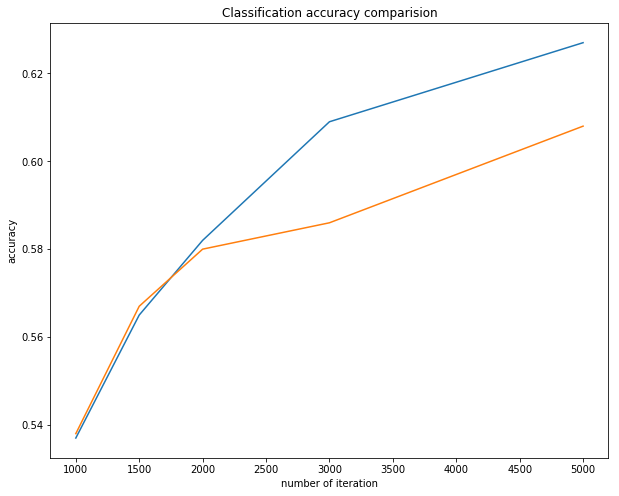

In [12]:
# Visualizing their performance
plt.figure(1)
plt.plot(num_of_iterations,m_h,label='momentum')
plt.plot(num_of_iterations,sgd_h,label='sgd')
plt.title('Classification accuracy comparision')
plt.xlabel('number of iteration')
plt.ylabel('accuracy')